## Hausaufgabe 7

## ACHTUNG: Da das eigentliche Testat außerhalb der Vorlesungszeit liegt, bieten wir zwei Möglichkeiten für die Abgabe an:
----
## Szenario A:
### Abgabe via studip bis spätestens 17.07. 12:00 Uhr! 
### Verteidigung 20.07. 08:00-10:00 Uhr (Timeslots werden vorher bekannt gegeben)!
----
## Szenario B:
### Abgabe via studip bis spätestens 12.07. 12:00 Uhr! 
### Verteidigung 14.07. 08:00-10:00 Uhr (Timeslots werden vorher bekannt gegeben)!
----
### Bitte wählen sie eine der beiden Möglichkeiten und laden Sie Ihre Lösung im entsprechenden Stud-IP Ordner hoch.

- In jedem Blatt kann maximal 5% Bonus erreicht werden, falls:
    - Mind. 60% des Arbeitsblatts korrekt bearbeitet wurde und
    - das Arbeitsblatt erfolgreich verteidigt (den Tutoren erklärt) wurde.
    - Bonus % = 5% * Teil der Hausaufgabe erfolgreich verteidigt
    - Erfolgreiche Verteidigung: Ein von uns ausgewähltes Team-Mitglied erklärt die Lösung und beantwortet Fragen dazu.
    - ChatGPT und andere Hilfsmittel dürfen verwendet werden, müssen aber zitiert werden.
    - Code muss ohne Hilfsmittel erläutert werden
- Wir bewerten nicht nur die Korrektheit der Ergebnisse, sondern auch ob der Code effizient, einfach zu verstehen, aufgeräumt und gut dokumentiert ist.
- Geben Sie eine Lösung pro Gruppe ab und packen Sie Ihre Lösung in eine Zip-Datei mit dem Namen und Matrikelnummer eines Mitglieds. Also z.B. `mustermann_12345678.zip` 

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import sklearn
from sklearn import neighbors
import statistics
import random

from utils import color1, color2, custom_cmap

---

## Aufgabe 1 (45%): K-Nearest-Neighbours/Logistic-Regression

a) (5%) Laden Sie die Daten "samples.npy" und "labels.npy". Visualisieren Sie die Samples in einem Scatterplot mit den importierten Farben "color1" und "color2" für die verschiedenen Labels. 

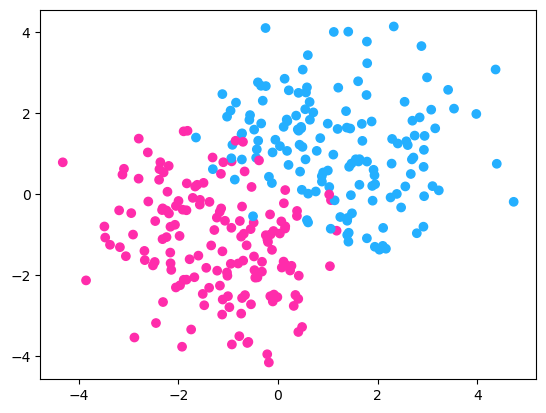

In [2]:
samples = np.load("samples.npy")
labels = np.load("labels.npy")
x = samples[:, 0]
y = samples[:, 1]

colors = [color1 if label else color2 for label in labels]
plt.scatter(x, y, c=colors)

b) (5%) Fitten Sie einen KNeighborsClassifier Algorithmus von sklearn mit k=2 und berechnen Sie die Classification Accuracy 

In [3]:
knn = neighbors.KNeighborsClassifier(n_neighbors=2)

knn.fit(samples, labels)
print(f"Accuracy: {knn.score(samples, labels)}")

Accuracy: 0.9633333333333334


Quellen:
- https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html
- https://www.datacamp.com/tutorial/k-nearest-neighbor-classification-scikit-learn

c) (15%) Plotten Sie in Ihre Figure von a) die gefitteten Klassifizierungs-Grenzen aus b). 

Tipp: Erstellen Sie mit np.meshgrid ein Raster, von dem Sie dann jeden Punkt von Ihrem gefitteten KNeighborsClassifier klassifizieren lassen. Plotten Sie dann das Ergebnis mit plt.imshow. Als cmap können Sie die importierte "custom_cmap" nutzen. 

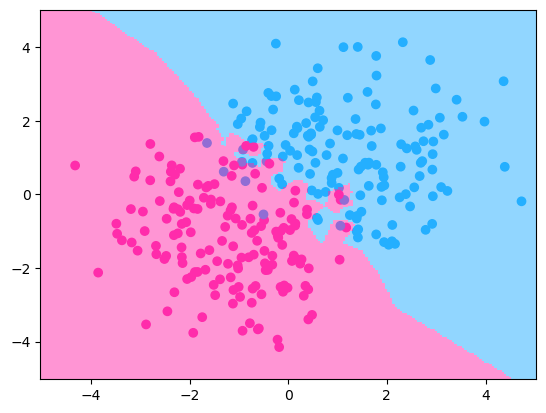

In [4]:
xx, yy = np.meshgrid(np.linspace(-5, 5, 200), np.linspace(-5, 5, 200))

# Reshape the meshgrid coordinates
mesh_points = np.c_[xx.ravel(), yy.ravel()]

# Make predictions for each point in the meshgrid
predictions = knn.predict(mesh_points)

# Reshape the predictions back to the meshgrid shape and inverse them
predictions = 1 - predictions.reshape(xx.shape)

plt.scatter(x, y, c=colors)
plt.pcolormesh(xx, yy, predictions, cmap=custom_cmap)

Quelle: ChatGPT

d) (5%) Sie werden kleine Inseln in den Klassifizierungs-Grenzen erkennen. Was ist der kleinste Wert von k, mit dem die Inseln verschwinden? Für welchen Wert von k ist die Accuracy am besten?

In [5]:
for i in range(2, 15):
    knn_test = sklearn.neighbors.KNeighborsClassifier(n_neighbors=i)

    knn_test.fit(samples, labels)
    print(f"k={i}: {knn_test.score(samples, labels)}") 

k=2: 0.9633333333333334
k=3: 0.9666666666666667
k=4: 0.95
k=5: 0.9466666666666667
k=6: 0.9433333333333334
k=7: 0.9433333333333334
k=8: 0.9433333333333334
k=9: 0.9466666666666667
k=10: 0.9466666666666667
k=11: 0.9466666666666667
k=12: 0.95
k=13: 0.9466666666666667
k=14: 0.9466666666666667


Die Inseln verschwinden ab k=14, die Accuracy ist bereits ab k=3 am höchsten.

e) (5%) Laden Sie die Testdaten "samples_test.npy" und "labels_test.npy" und berechnen Sie auch hierfür die Accuracy. Was fällt Ihnen auf?

In [6]:
samples_test = np.load("samples_test.npy")
labels_test = np.load("labels_test.npy")

for i in range(2, 15):
    knn_test = sklearn.neighbors.KNeighborsClassifier(n_neighbors=i)

    knn_test.fit(samples, labels)
    print(f"k={i}: {knn_test.score(samples_test, labels_test)}") 

k=2: 0.9
k=3: 0.92
k=4: 0.91
k=5: 0.94
k=6: 0.93
k=7: 0.93
k=8: 0.93
k=9: 0.93
k=10: 0.93
k=11: 0.94
k=12: 0.93
k=13: 0.94
k=14: 0.93


Die Accuracy ist bei jedem k etwas schlechter, weil das Modell die Test Daten "zum ersten mal sieht" also nicht auf ihnen trainiert wurde.

f) (10%) Fitten Sie die Daten nun mit einer LogisticRegression von sklearn und erstellen Sie auch hier den Plot aus c), einmal mit den kontinuierlichen Klassifizierungs-"Grenzen" und einmal mit den harten Grenzen (Threshold bei 0.5). Vergleichen Sie die die train und test Accuracies und vergleichen Sie Ihre Ergebnisse mit dem KNeighborsClassifier.

Text(0.5, 1.0, 'Harte Grenzen (Threshold bei 0.5)')

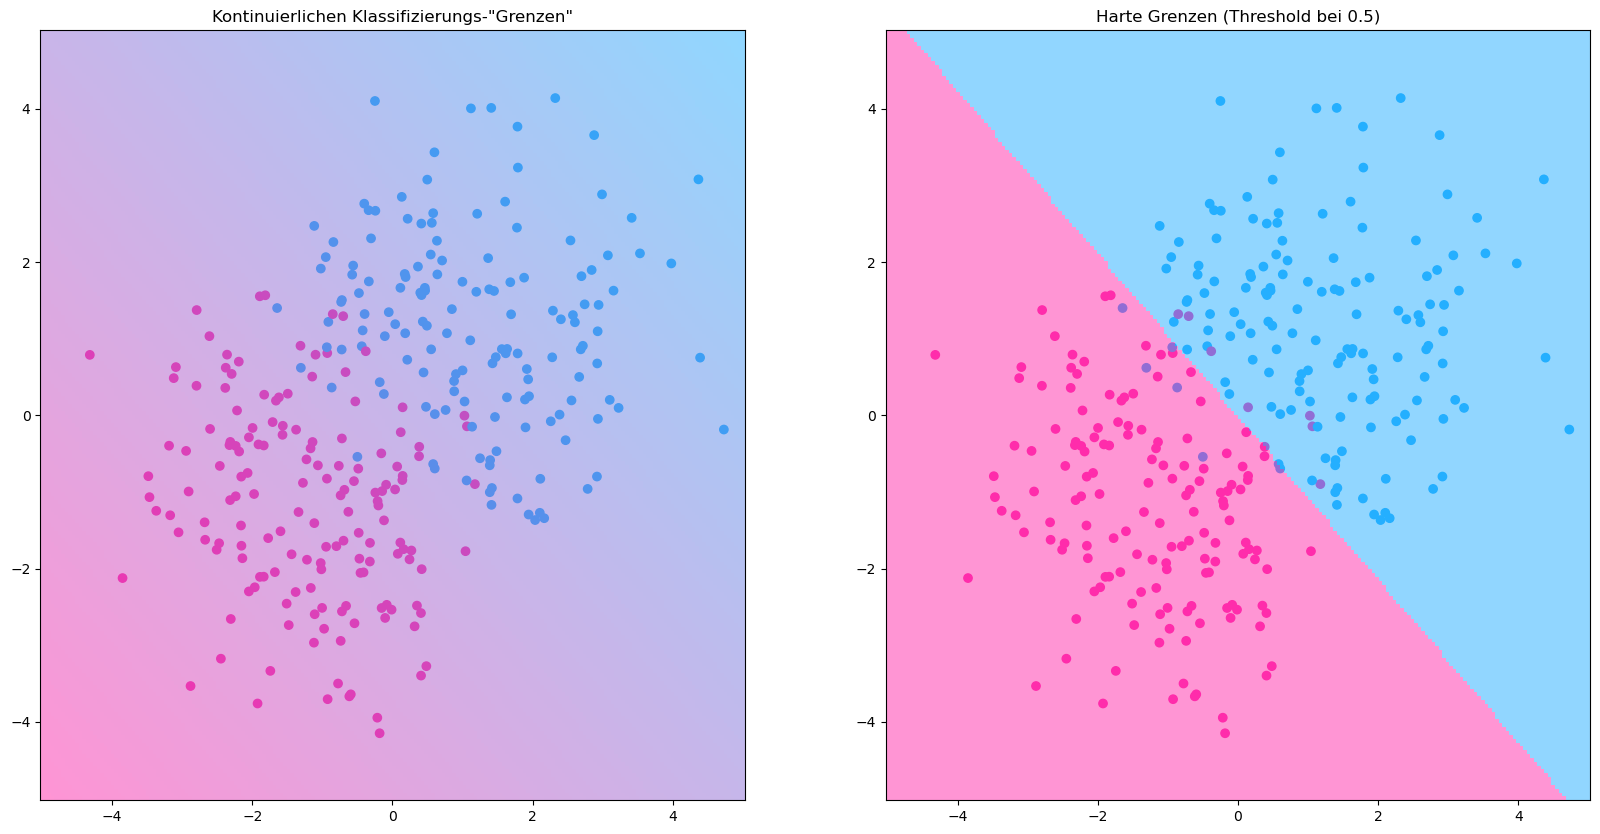

In [7]:
clf = sklearn.linear_model.LogisticRegression(random_state=0)

clf.fit(samples, labels)

xx, yy = np.meshgrid(np.linspace(-5, 5, 200), np.linspace(-5, 5, 200))

# Reshape the meshgrid coordinates
mesh_points = np.c_[xx.ravel(), yy.ravel()]

# Make predictions for each point in the meshgrid
predictions = clf.predict(mesh_points)
predictions_con = clf.decision_function(mesh_points)

# Reshape the predictions back to the meshgrid shape and inverse them
predictions = 1 - predictions.reshape(xx.shape)
predictions_con = 1 - predictions_con.reshape(xx.shape)

fig, ax = plt.subplots(1, 2, figsize=(20,10))

ax[0].scatter(x, y, c=colors)
ax[1].scatter(x, y, c=colors)

ax[0].pcolormesh(xx, yy, predictions_con, cmap=custom_cmap)
ax[1].pcolormesh(xx, yy, predictions, cmap=custom_cmap)

ax[0].set_title("Kontinuierlichen Klassifizierungs-\"Grenzen\"")
ax[1].set_title("Harte Grenzen (Threshold bei 0.5)")

In [8]:
print(f"Logistic Regression Train Accuracy: {clf.score(samples, labels)}")
print(f"Logistic Regression Test Accuracy: {clf.score(samples_test, labels_test)}")
print(f"KNeighborsClassifier (k=2) Train Accuracy: {knn.score(samples, labels)}")
print(f"KNeighborsClassifier (k=2) Test Accuracy: {knn.score(samples_test, labels_test)}")

Logistic Regression Train Accuracy: 0.95
Logistic Regression Test Accuracy: 0.94
KNeighborsClassifier (k=2) Train Accuracy: 0.9633333333333334
KNeighborsClassifier (k=2) Test Accuracy: 0.9


Quelle: https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html

---

## Aufgabe 2 (55%): Cross Validation

Nutzen Sie in dieser Aufgabe aus sklearn nur den KNeighborsClassifier. Sollten Sie bei einer Teilaufgabe nicht weiter kommen, können Sie auch weitere Funktionen aus sklearn nutzen, wie z.B. "train_test_split" oder "cross_val_score". Dann aber selbstverständlich ohne die Punkte aus der jeweiligen Teilaufgabe zu erhalten.

a) (10%) Laden Sie die Daten "ex2_samples.npy" und "ex2_labels.npy" und visualisieren Sie sie wie in Aufgabe 1. Sie werden sehen, dass die Daten nicht mit einem linearen Classifier klassifizierbar sind. Schreiben Sie eine Funktion, die die Daten in ein anderes Koordinatensystem transformiert, in dem sie leichter zu klassifizieren sind. 

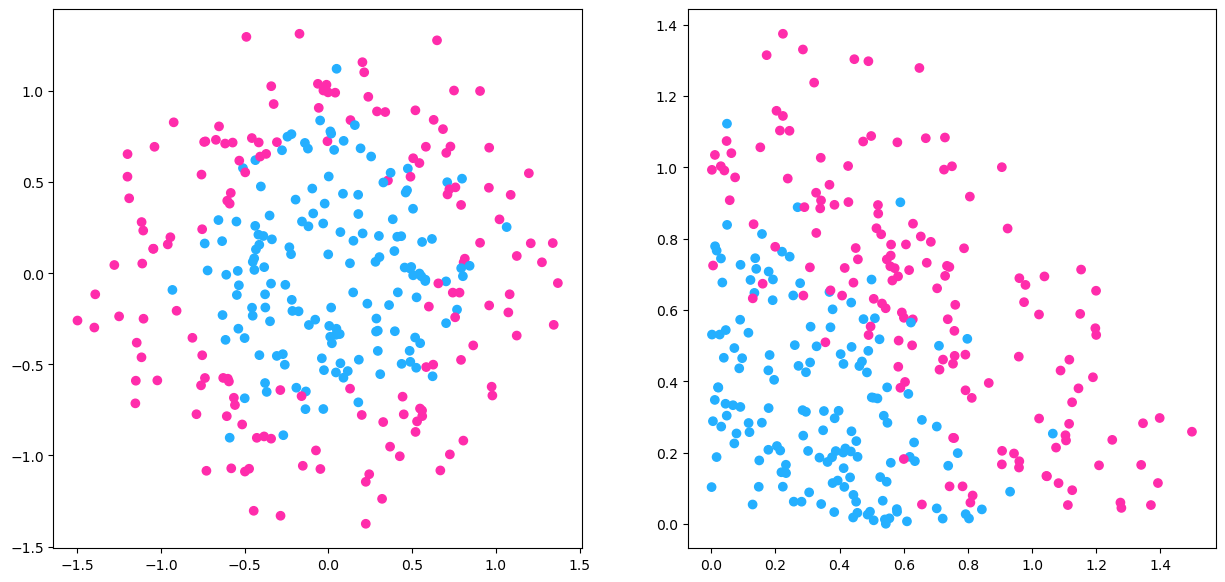

In [9]:
ex2_samples = np.load("ex2_samples.npy")
ex2_labels = np.load("ex2_labels.npy")
x = ex2_samples[:, 0]
y = ex2_samples[:, 1]
colors = [color1 if label else color2 for label in ex2_labels]
fig, ax = plt.subplots(1, 2, figsize=(15,7))
ax[0].scatter(x, y, c=colors)


def classifiable(x,y):
    x = abs(x)
    y = abs(y)
    return x,y


new_x, new_y = classifiable(x,y)

ax[1].scatter(new_x, new_y, c=colors)

b) (10%) Fitten Sie einen KNeighborsClassifier für verschiedene Werte von "k" and den Trainingsdaten und berechnen Sie Accuracy für die Trainings- und Testdaten. Erstellen Sie einen Plot für "k" vs "Accuracy" für Train- und Test-Accuracy

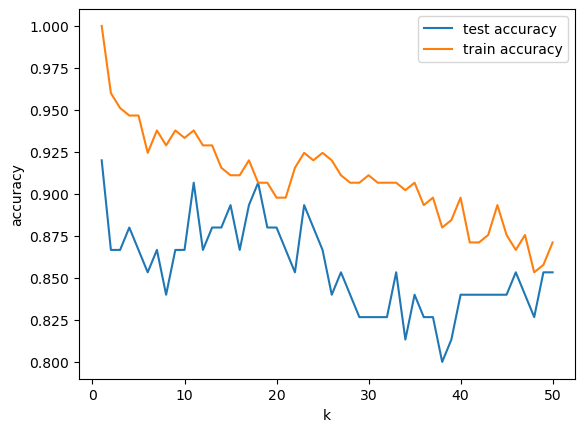

In [10]:
acc_test = []
acc_train = []
k = [i for i in range(1,51)]    
ex2_samples_train = []
ex2_samples_test = []
ex2_labels_train = []
ex2_labels_test = []

# Split data in train and test data
for i in range(len(ex2_samples)):
    rand_num = random.randrange(len(ex2_samples))
    if i < len(ex2_samples)*0.25:
        ex2_samples_test.append(ex2_samples[rand_num])
        ex2_labels_test.append(ex2_labels[rand_num])
    else:
        ex2_samples_train.append(ex2_samples[rand_num])
        ex2_labels_train.append(ex2_labels[rand_num])
    np.delete(ex2_samples, rand_num)
    np.delete(ex2_labels, rand_num)

# Compute accuracy        
def accuracy(test, pred):
    correct = 0
    for j in range(len(test)):
        if test[j] == pred[j]:
            correct += 1
    return correct/len(test)

# Make predictions for differenk k values and add them to lists
for i in range(1, 51):
    knn = neighbors.KNeighborsClassifier(n_neighbors=i)
    knn.fit(ex2_samples_train, ex2_labels_train)

    labels_pred1 = knn.predict(ex2_samples_test)
    acc_test.append(accuracy(ex2_labels_test, labels_pred1)) 
    
    labels_pred2 = knn.predict(ex2_samples_train)
    acc_train.append(accuracy(ex2_labels_train, labels_pred2))   
    
test = plt.plot(k, acc_test, label="test accuracy")
train = plt.plot(k, acc_train, label="train accuracy")
plt.xlabel("k")
plt.ylabel("accuracy")
plt.legend()
plt.show()

c) (30%) Splitten Sie ihre Trainingsdaten in verschiedene Trainings- und Validationsets und führen Sie CrossValidation durch, um den besten Wert für "k" zu finden. 

In [11]:
best_k_list = []
folds = 4
accuracies = []

# repeat cross validation 20 times
for z in range(20):
    acc_models = []
    models = []
    data_split_samples = []
    data_split_labels = []
    samples_copy = list(ex2_samples_train.copy())
    labels_copy = list(ex2_labels_train.copy())
    fold_size = len(ex2_samples_train)//folds
    for i in range(4):
        fold_samples = []
        fold_labels = []
        while len(fold_samples) < fold_size:
            index = random.randrange(len(samples_copy))
            fold_samples.append(samples_copy.pop(index))
            fold_labels.append(labels_copy.pop(index))
        data_split_samples.append(fold_samples)
        data_split_labels.append(fold_labels)
        
    # Go over folds
    for i in range(folds):
        acc_test_model = []
        train_samples = data_split_samples.copy()
        train_labels = data_split_labels.copy()
        test_samples = train_samples.pop(i)
        train_samples2 = np.asarray(train_samples)
        train_samples = []
        for j in train_samples2:
            for l in j:
                train_samples.append(l)
        test_labels = train_labels.pop(i)
        train_labels = np.asarray(train_labels)
        train_labels = train_labels.flatten()
        
        # Train Model 50 times on current folds
        for k in range(1, 51):
            knn = neighbors.KNeighborsClassifier(n_neighbors=k)
            knn.fit(train_samples, train_labels)
            y_pred = knn.predict(test_samples)
            acc_test_model.append(accuracy(test_labels, y_pred)) 
        acc_models.append(acc_test_model)
    
    # Create list of all accuracies for 2d)
    for y in acc_models:
        accuracies.append(y)
        
    # calculate average of accuracy for every k
    acc_models = np.array(acc_models)
    averages = np.average(acc_models, axis=0)
    
    # Index of value == k-1
    best_k = np.argmax(averages) + 1
    best_k_list.append(best_k)

best_k_list.sort()
best_k = int(statistics.median(best_k_list))
print(best_k_list)
print(f"The optimal k value is: {best_k}")

[1, 1, 1, 1, 1, 1, 3, 3, 3, 3, 3, 3, 5, 5, 7, 7, 9, 13, 16, 18]
The optimal k value is: 3


In [12]:
knn_best = neighbors.KNeighborsClassifier(n_neighbors=best_k)
knn_best.fit(ex2_samples_train, ex2_labels_train)
labels_pred = knn_best.predict(ex2_samples_test)
print(f"k={best_k} Accuracy: {accuracy(ex2_labels_test, labels_pred)}")

k=3 Accuracy: 0.8666666666666667


d) (5%) Plotten Sie "k" vs "CrossValidation Accuracy" mit den zugehörigen Fehlerbalken. Stimmt ihr so ermittelter Wert für "k" mit dem tatsächlich besten Wert für "k" an den Testdaten überein?

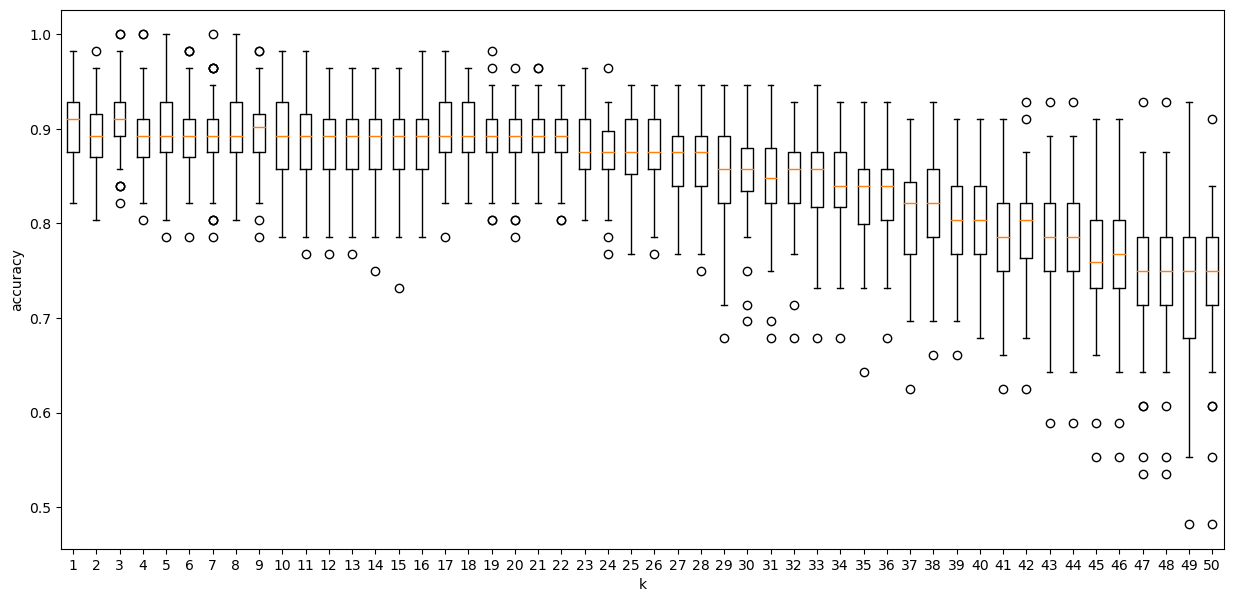

In [13]:
accuracies = np.array(accuracies)
plt.subplots(figsize=(15,7))
plt.boxplot(accuracies)
plt.xlabel("k")
plt.ylabel("accuracy");

Der ermittelte beste Wert für k stimmt nicht mit dem tatsächlich besten Wert für k überein. Der tatsächlich beste k Wert aus 2b) zu entnehmen, er variiert allerdings, weil die Verteilung der Trainings- und Testdaten dem Zufall unterliegt. In diesem Fall ist der tatsächlich beste Wert für k = 1

---